# 1.0 About Auther

- **Project**: Customer Segmentation
- **Auther**: Mutayyub Majeed
- **Date**: 
- **Contact Info.**  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/mutayyubmajeed/)  
[![GitHub](https://img.shields.io/badge/GitHub-Profile-black?style=for-the-badge&logo=github)](https://github.com/mutayyub)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/mutayyubmajeed)  
[![Twitter](https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/mutayyubmajeed)
[![Facebook](https://img.shields.io/badge/Facebook-Profile-1877F2?style=for-the-badge&logo=facebook&logoColor=white)](https://www.facebook.com/mutayyubmajeed/)


# 2.0 About Data

- **Dataset**: [Online Retail II UCI](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci?utm_source=chatgpt.com)

### **Context**
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store `online retail data between 01/12/2009 and 09/12/2011`.The company mainly `sells unique all-occasion gift-ware`. Many `customers of the company are wholesalers`.

#### - Acknowledgements  

This work is inspired by several studies in online retail and customer analytics:  
- Chen, Sain & Guo (2012) applied RFM (Recency, Frequency, Monetary) model–based segmentation in online retail.  
- Chen, Guo & Ubakanma (2015) extended RFM into a time series model to predict customer profitability over time.  
- Chen, Guo & Li (2019) compared methods for dynamically predicting customer profitability.  
- Laha Ale et al. (2019) used deep recurrent neural networks for proactive caching in mobile edge computing.  
- Singh et al. (2018) proposed prefix and suffix sequential pattern mining for better data pattern discovery.  

## Task/Goal
In this notebook, we aim to perform customer segmentation on the Online Retail II dataset using RFM (Recency, Frequency, Monetary) analysis and clustering techniques to group customers based on their purchasing behavior.

# Import Libraries

In [48]:
# import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import datetime as dt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

# Load the CSV file

In [49]:
df = pd.read_csv('./dataset/online_retail.csv')

In [50]:
# Let's see the first 5 rows of the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Attributes Description

| **Attribute** | **Description**                                                                                                                                        | **Type** |
| ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ | -------- |
| `InvoiceNo`   | Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation. | Nominal  |
| `StockCode`   | Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.                                                             | Nominal  |
| `Description` | Product (item) name.                                                                                                                                   | Nominal  |
| `Quantity`    | The quantities of each product (item) per transaction.                                                                                                 | **Numeric**  |
| `InvoiceDate` | Invoice date and time. The day and time when a transaction was generated.                                                                              | **Numeric**  |
| `UnitPrice`   | Unit price. Product price per unit in sterling (£).                                                                                                    | **Numeric**  |
| `CustomerID`  | Customer number. A 5-digit integral number uniquely assigned to each customer.                                                                         | Nominal  |
| `Country`     | Country name. The name of the country where a customer resides.                                                                                        | Nominal  |

# EDA and Data Wrangling

In [51]:
# check number of rows and columns

print(f"The number of rows  are: {df.shape[0]}")
print(f"And the number of columns  are: {df.shape[1]}")

The number of rows  are: 1067371
And the number of columns  are: 8


In [52]:
# Let's get some basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [53]:
# Convert Customer ID to string (nominal categorical)

df['Customer ID'] = df['Customer ID'].astype('Int64').astype('string')

In [54]:
# Convert InvoiceDate to datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [55]:
# Check data types after conversion
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID    string[python]
Country                object
dtype: object

## missing values

In [56]:
# check missing values

df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [57]:
# drop rows with missing values in Customer ID

df.dropna(subset=['Customer ID'], inplace=True)

In [58]:
# check missing values again (after removing rows with missing values in Customer ID)

df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [59]:
# check number of rows after removing rows with missing values

print(f"The number of rows after removing rows with missing values are:\n {df.shape[0]}")

The number of rows after removing rows with missing values are:
 824364


### Observations 5.1

1. **Data Overview**
   - Total rows: **1,067,371**
   - Columns: 8 (`Invoice`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `Price`, `Customer ID`, `Country`).
   - Missing values:
     - `Description` → 4,382 **missing**.
     - `Customer ID` → 242,257 **missing**.

2. **Customer ID**
   - Originally stored as `float64` with missing values.
   - Since it represents a unique customer identifier, it is a **nominal categorical variable**. Converted to `string` type.
   - Every **Customer ID** is unique so we can't impute missing values, that's why we have droped those rows with missing values.

3. **InvoiceDate**
   - Originally stored as `object` (string). Converted to `datetime` format.


In [60]:
# Count unique values in each column
unique_counts = df.nunique().sort_values(ascending=True)

print(f"Unique values per column:\n {unique_counts}")

Unique values per column:
 Country           41
Quantity         643
Price           1022
StockCode       4646
Description     5299
Customer ID     5942
InvoiceDate    41439
Invoice        44876
dtype: int64


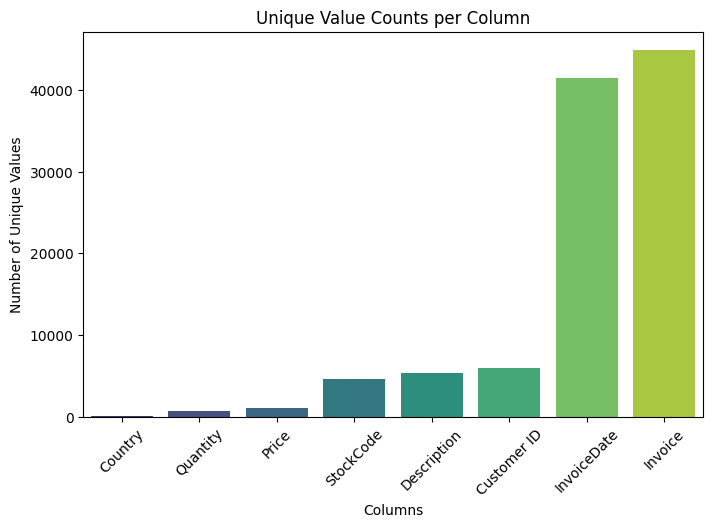

In [61]:
# Let's see this through count plot
plt.figure(figsize=(8,5))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")

plt.title("Unique Value Counts per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.xticks(rotation=45)
plt.show()

In [62]:
# check basic statistics
df[['Quantity', 'Price']].describe()
df.describe(include=[np.number])

,Quantity,Price
count,824364.000000,824364.000000
mean,12.414574,3.676800
std,188.976099,70.241388
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


### **Observations from basic stat**

* **Quantity**

  * Typical order sizes are small (median = 5 & 75% = 12).
  * Mean = 13.3, but much larger than median → indicates **right-skewed distribution** due to extreme values.
  * Maximum quantity = **80,995**, which can be an **outlier** compared to typical orders.

* **Price**

  * Most products are inexpensive (median = 1.95 & 75% = 3.75).
  * Mean = 3.67, also higher than median → distribution is **right-skewed**.
  * Maximum price = **10,953.5**, much higher than the majority of items → suggests **outliers or rare expensive products**.
  * Minimum price = 0 → indicates **free items, discounts, or potential data quality issues**.


## Outliers

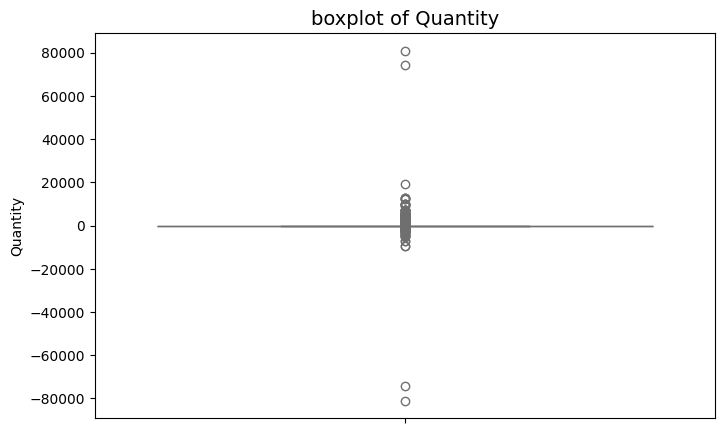

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(df['Quantity'], color="skyblue")
plt.title("boxplot of Quantity", fontsize=14)
plt.ylabel("Quantity")
plt.show()

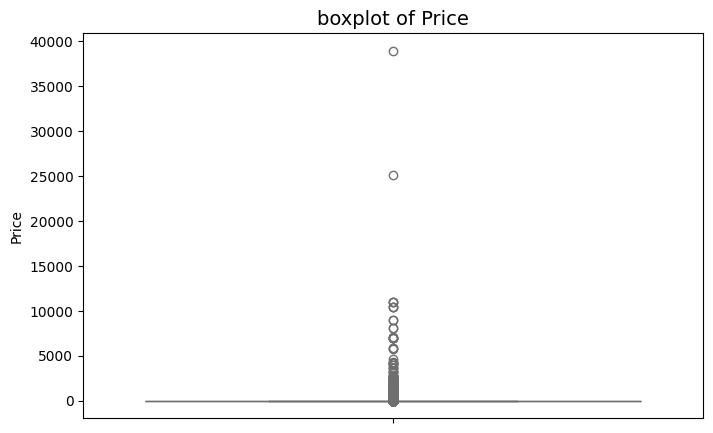

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(df['Price'], color="skyblue")
plt.title("boxplot of Price", fontsize=14)
plt.ylabel("Price")
plt.show()

#### **Invoices** starting with "C" represent cancelled orders, let's see those transactions


In [65]:
# Find cancelled invoices
cancelled = df[df['Invoice'].str.startswith('C')]

# Check how many cancelled orders
print("Cancelled orders:", cancelled.shape[0])

# Quick look
cancelled.head()


Cancelled orders: 18744


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia


In [66]:
# Remove cancelled invoices (those starting with 'C')
df = df[~df['Invoice'].str.startswith('C')]

# Reset index after removal
df = df.reset_index(drop=True)

print("Dataset after removing cancelled invoices:", df.shape)

Dataset after removing cancelled invoices: (805620, 8)


* Invoices starting with "C" represent cancelled orders. These rows were removed from the dataset to ensure that only valid purchases are considered.

> check for zero or negative

In [67]:
zero_price = df[df["Price"] <= 0]
print(zero_price.shape)
zero_price.head()

(71, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3631,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126,United Kingdom
4754,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658,United Kingdom
12751,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231,United Kingdom
14138,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108,United Kingdom
14139,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108,United Kingdom


> Remove rows where Price is `0` or negative

In [68]:
df = df[df["Price"] > 0]

In [69]:
print(f"The remaining number of rows after cleaning are:\n {df.shape[0]}")

The remaining number of rows after cleaning are:
 805549


## Filtering Non-Standard StockCodes

In [70]:
# ALL ONLY non-numeric stock codes
wrong_stock_codes= df[df["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$")]["StockCode"].unique().tolist()

df[df["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST,32
BANK CHARGES,32
D,5
DOT,16
M,709
PADS,17
POST,1838


In [71]:
# Keep only rows where StockCode does NOT match the letter pattern
df = df[~df["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$", na=False)]

In [72]:
# Other non-numeric stock codes
wrong_stock_codes2= df[df["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}")]["StockCode"].unique().tolist()
df[df["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST2,3
TEST001,9
TEST002,1


In [73]:
# Keep only rows where StockCode does NOT contain 3 or more consecutive letters
df = df[~df["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}", na=False)]

In [74]:
print(f"The remaining number of rows after cleaning are:\n {df.shape[0]}")

The remaining number of rows after cleaning are:
 802887


### Observation

- We applied data cleaning rules to remove invalid and non-business transactions:

    - Cancelled invoices (Invoice starting with "C") were dropped.

    - Rows with negative or zero Quantity or Price (returns, free samples, data entry errors) were removed.

    - Administrative records such as "Manual" adjustments as `M` and "Postage" charges as `POST` were excluded, as they do not represent real product sales.


> **ADJUST, ADJUST2** `→` adjustment entries, not real sales.
> 
> **BANK CHARGES** `→` fees, not purchases.
> 
> **D, DOT, PADS** `→` most likely placeholder/test codes or admin entries.
> 
> **TEST001, TEST002** `→` test products, not real transactions.

### Observation
- Removed non-purchase entries (e.g., adjustments, test products, bank charges) to ensure only genuine customer transactions are used for CLV prediction.

## Duplicates

In [75]:
# Check for full-row duplicates
duplicates = df[df.duplicated()]

print("Number of duplicate rows:", duplicates.shape[0])


Number of duplicate rows: 26060


In [76]:
# To see all duplicates (both first and second occurrences)
duplicates1 = df[df.duplicated(keep=False)]
duplicates1.shape

(50712, 8)

In [77]:
# rows before removing duplicates
print("Before removing duplicates:", df.shape)

# Remove duplicates
df = df.drop_duplicates()

# rows after removing duplicates
print("After removing duplicates:", df.shape)


Before removing duplicates: (802887, 8)
After removing duplicates: (776827, 8)


> `Duplicates` rows has been `Removed` to ensures cleaner data.


## Distribution of Quantity and Price

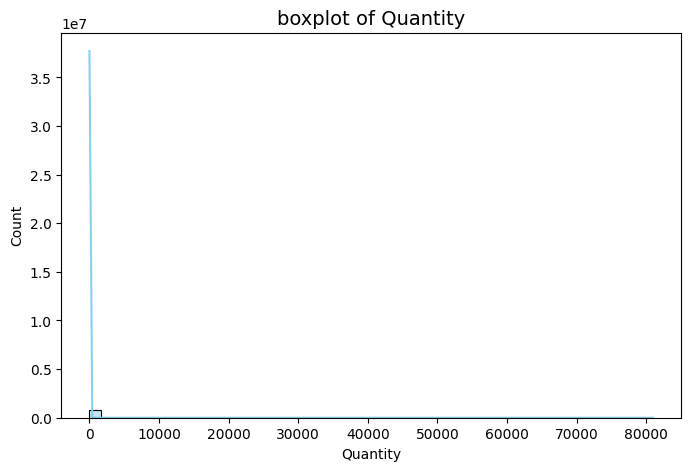

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=True, color="skyblue")
plt.title("boxplot of Quantity", fontsize=14)
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

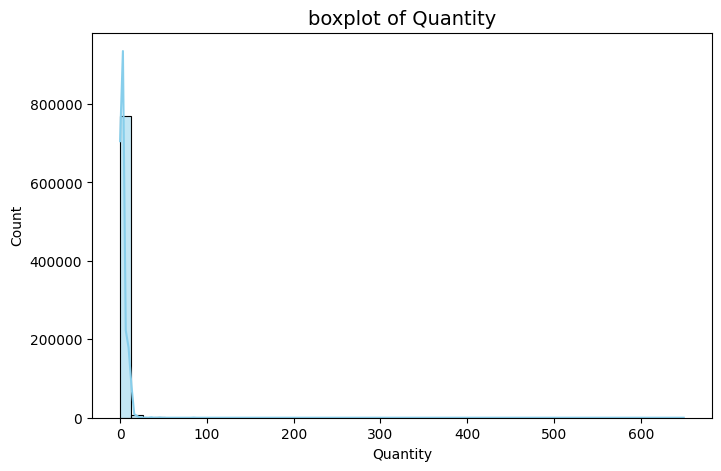

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True, color="skyblue")
plt.title("boxplot of Quantity", fontsize=14)
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

### Observations on Quantity and Price Distributions

* The distribution of **Quantity** is heavily right-skewed. Most transactions involve small item counts, while a few orders show extremely large quantities, indicating rare bulk purchases.
* The distribution of **Price** is also right-skewed. Most items are low-cost, but a small fraction of products are very expensive, creating extreme outliers.
* This skewness in both Quantity and Price suggests that bulk purchases and high-priced items are rare but impactful. 

In [33]:
print("Maximum Price per unit:", df['Price'].max())
print("Minimum Price per unit", df['Price'].min())
print("Maximum Quantity", df['Quantity'].max())
print("Minimum Quantity", df['Quantity'].min())

Maximum Price per unit: 649.5
Minimum Price per unit 0.03
Maximum Quantity 80995
Minimum Quantity 1


# **RFM**

> **Recency** → Days since last purchase (lower = more recent).
> 
> **Frequency** → Number of unique transactions in history window.
> 
> **Monetary** → Total spend in history window.


### Create a revenue column

In [34]:
# Create a revenue column
df["Revenue"] = df["Quantity"] * df["Price"]

In [35]:
# Pick reference date = day after last purchase
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

print("Dataset covers from:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
print("Reference date for recency calculation:", reference_date)

Dataset covers from: 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Reference date for recency calculation: 2011-12-10 12:50:00


In [36]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference date:", reference_date)

Reference date: 2011-12-10 12:50:00


In [37]:
df.shape

(776827, 9)

## Calculate RFM

In [38]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                  # Frequency
    'Revenue': 'sum',                                         # Monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Revenue': 'Monetary',
}, inplace=True)

rfm = rfm.reset_index()

rfm.head()


,Customer ID,Recency,Frequency,Monetary
0,12346,326,3,77352.96
1,12347,2,8,4921.53
2,12348,75,5,1658.40
3,12349,19,3,3678.69
4,12350,310,1,294.40


# Find optimal k using the elbow method

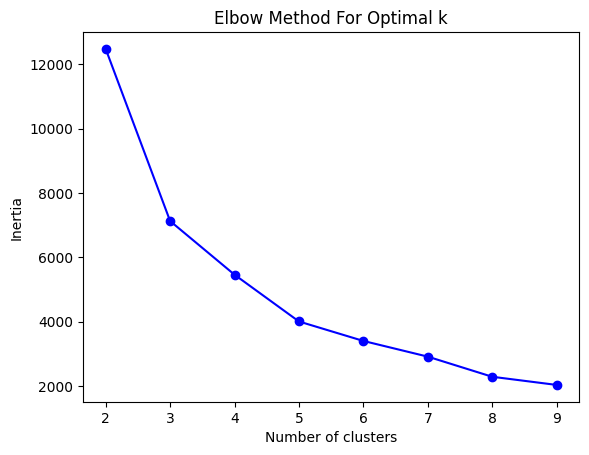

In [39]:
# Features for clustering (exclude Customer ID)
X = rfm.drop(columns=['Customer ID'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal k using the elbow method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


# Apply K-Means model and assign clusters

In [40]:
# Apply the K-Means model and assign clusters
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

## Evaluation metrics

1. Silhouette Score

    - Measures how well points fit within their cluster compared to other clusters. (Range = [-1, 1])

        - Closer to 1 → well-separated clusters.

        - Near 0 → overlapping clusters.

        - Negative → likely misclassified.

In [41]:
score = silhouette_score(X_scaled, rfm['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.5812681812309984


2. Calinski–Harabasz Index (Variance Ratio Criterion)

    - Higher = better separation between clusters.

In [42]:
ch_score = calinski_harabasz_score(X_scaled, rfm['Cluster'])
print("Calinski-Harabasz Index:", ch_score)


Calinski-Harabasz Index: 4278.268629927299


3. Davies–Bouldin Index

    - Lower = better clustering (clusters are compact and far apart).

In [43]:
db_score = davies_bouldin_score(X_scaled, rfm['Cluster'])
print("Davies-Bouldin Index:", db_score)


Davies-Bouldin Index: 0.6683978444181028


## Visualizing Customer Segments in 2D Space

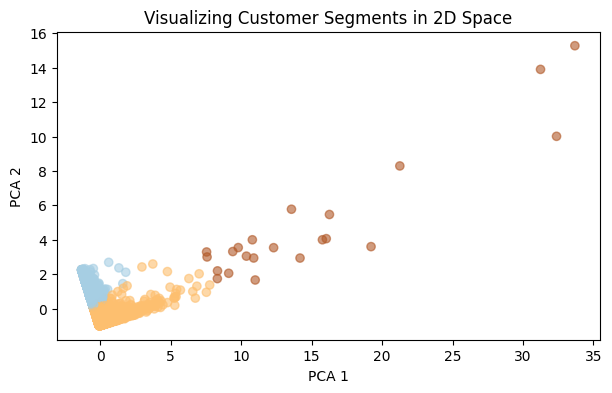

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=rfm['Cluster'], cmap='Paired', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualizing Customer Segments in 2D Space')
plt.show()


## cluster_summary

In [45]:
numeric_cols = ['Recency', 'Frequency', 'Monetary']

cluster_summary = rfm.groupby('Cluster')[numeric_cols].mean()
print("Cluster Summary: \n",cluster_summary)


Cluster Summary: 
             Recency   Frequency       Monetary
Cluster                                       
0        460.759175    2.204123     723.092826
1         66.397710    7.584852    3092.136926
2         23.090909  139.772727  171041.228182


## 3D Scatter Plot

In [46]:
# 3D Scatter Plot
fig = px.scatter_3d(
    rfm, 
    x='Recency', 
    y='Frequency', 
    z='Monetary',
    color='Cluster',
    color_continuous_scale='viridis',
    title='RFM Customer Segments',
    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary Value'},
    hover_name=rfm.index if 'Customer ID' not in rfm.columns else rfm['Customer ID'],
    opacity=0.7,
    size_max=10
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='Recency', # (Lower is better)
        yaxis_title='Frequency', # (Higher is better)
        zaxis_title='Monetary', # (Higher is better)
    ),
    width=700,
    height=600
)

fig.show()

## Bubble chart

In [47]:
# Bubble chart with cluster colors (to identify bulk buyers)
fig = px.scatter(
    rfm,
    x='Recency',
    y='Frequency',
    size='Monetary',
    color='Cluster',
    hover_name=rfm.index if 'Customer ID' not in rfm.columns else rfm['Customer ID'],
    title='RFM Clusters (Bubble Size = Monetary Value)',
    size_max=30
)
fig.show()

## 📊 Observations from Clustering

Customers were segmented into three distinct groups based on **RFM (Recency, Frequency, Monetary)** values.

**Cluster 0 – Low Value / Inactive Customers**

* **Recency \~461 days** → purchased a long time ago.
* **Low frequency (\~2 orders)** and **low spend (\~\$723)**.
* Represents **inactive or one-time buyers** at risk of churn.

**Cluster 1 – Mid Value Customers**

* **Recency \~66 days** → purchased somewhat recently.
* **Frequency \~8 orders** with **moderate spend (\~\$3.1k)**.
* Represents **active retail customers** who contribute steadily.

**Cluster 2 – High Value Customers (incl. Wholesalers)**

* **Very recent (\~23 days)** and **very frequent buyers (\~140 orders)**.
* **Extremely high spend (\~\$171k)** → bulk purchasing behavior.
* Represents **wholesale buyers driving most revenue**.

---


```

Current clustering includes both retail customers and wholesalers.

In future analysis, we can separate wholesalers first, then apply RFM segmentation only on retail customers for more accurate insights.


```